In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
plt.style.use ("dark_background")

In [78]:
dataset = pd.read_csv ('media prediction and its cost.csv')
dataset

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [79]:
dataset.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [80]:
dataset.isna().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [81]:
dataset.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [82]:
dataset.info()
dataset.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

food_category                   45
food_department                 22
food_family                      3
store_sales(in millions)      1033
store_cost(in millions)       9919
unit_sales(in millions)          6
promotion_name                  49
sales_country                    3
marital_status                   2
gender                           2
total_children                   6
education                        5
member_card                      4
occupation                       5
houseowner                       2
avg_cars_at home(approx)         5
avg. yearly_income               8
num_children_at_home             6
avg_cars_at home(approx).1       5
brand_name                     111
SRP                            315
gross_weight                   376
net_weight                     332
recyclable_package               2
low_fat                          2
units_per_case                  36
store_type                       5
store_city                      19
store_state         

In [83]:
dataset.nunique()

food_category                   45
food_department                 22
food_family                      3
store_sales(in millions)      1033
store_cost(in millions)       9919
unit_sales(in millions)          6
promotion_name                  49
sales_country                    3
marital_status                   2
gender                           2
total_children                   6
education                        5
member_card                      4
occupation                       5
houseowner                       2
avg_cars_at home(approx)         5
avg. yearly_income               8
num_children_at_home             6
avg_cars_at home(approx).1       5
brand_name                     111
SRP                            315
gross_weight                   376
net_weight                     332
recyclable_package               2
low_fat                          2
units_per_case                  36
store_type                       5
store_city                      19
store_state         

In [84]:
dataset.corr()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.954685,0.503482,0.083313,0.004498,0.032437,0.004498,0.833478,0.036179,0.032014,...,0.015543,0.010442,0.017886,0.017883,-0.029368,0.019179,0.031459,0.031459,0.030603,-0.004621
store_cost(in millions),0.954685,1.000000,0.480087,0.079058,0.002865,0.027576,0.002865,0.795880,0.034237,0.030257,...,0.017877,0.012884,0.019245,0.019242,-0.027126,0.019252,0.033206,0.033206,0.030929,-0.004162
unit_sales(in millions),0.503482,0.480087,1.000000,0.163188,0.023667,0.066725,0.023667,-0.002358,0.001255,0.001137,...,0.031464,0.024857,0.030563,0.030557,-0.057633,0.034996,0.057878,0.057878,0.055885,-0.015015
total_children,0.083313,0.079058,0.163188,1.000000,0.098110,0.394709,0.098110,0.000545,-0.000186,0.000142,...,0.000555,0.018526,-0.026926,-0.026923,0.002836,-0.000591,-0.013764,-0.013764,-0.003361,-0.003900
avg_cars_at home(approx),0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,1.000000,-0.007921,0.004588,0.004155,...,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658
num_children_at_home,0.032437,0.027576,0.066725,0.394709,0.130841,1.000000,0.130841,-0.000477,-0.002480,-0.002535,...,0.006150,0.025008,-0.024624,-0.024617,-0.016873,-0.013750,-0.023680,-0.023680,-0.008918,-0.002549
avg_cars_at home(approx).1,0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,1.000000,-0.007921,0.004588,0.004155,...,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658
SRP,0.833478,0.795880,-0.002358,0.000545,-0.007921,-0.000477,-0.007921,1.000000,0.043332,0.038639,...,0.001663,-0.000505,0.004375,0.004374,-0.000014,0.002031,0.002811,0.002811,0.003998,0.002082
gross_weight,0.036179,0.034237,0.001255,-0.000186,0.004588,-0.002480,0.004588,0.043332,1.000000,0.988903,...,-0.005254,-0.004749,-0.004195,-0.004195,0.001933,0.002293,0.001944,0.001944,0.003109,0.001281
net_weight,0.032014,0.030257,0.001137,0.000142,0.004155,-0.002535,0.004155,0.038639,0.988903,1.000000,...,-0.004374,-0.003723,-0.003843,-0.003842,0.001816,0.002551,0.002656,0.002656,0.002579,0.001343


C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='food_category', ylabel='count'>

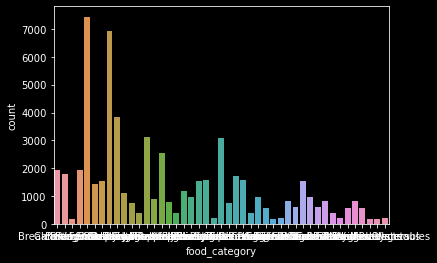

In [85]:
sns.countplot (dataset['food_category'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='food_department', ylabel='count'>

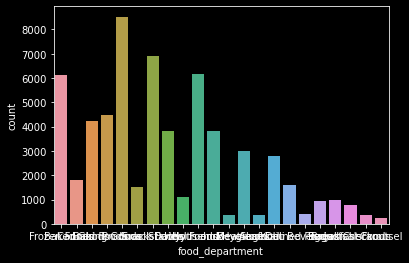

In [86]:
sns.countplot (dataset['food_department'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='food_family', ylabel='count'>

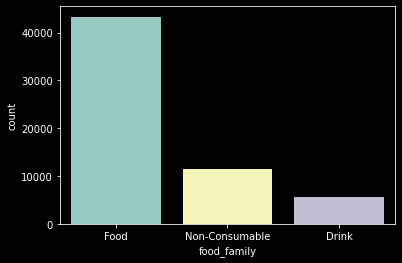

In [87]:
sns.countplot (dataset['food_family'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_country', ylabel='count'>

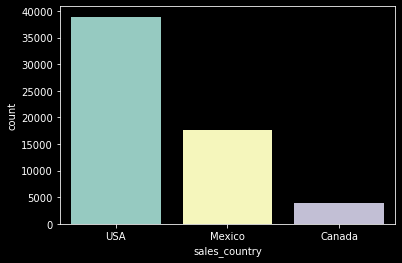

In [88]:
sns.countplot (dataset['sales_country'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

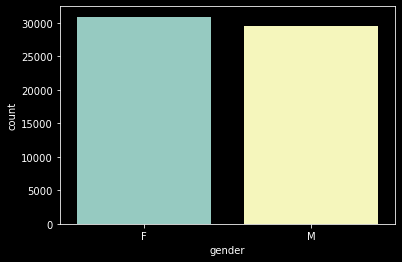

In [89]:
sns.countplot (dataset['gender'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_children_at_home', ylabel='count'>

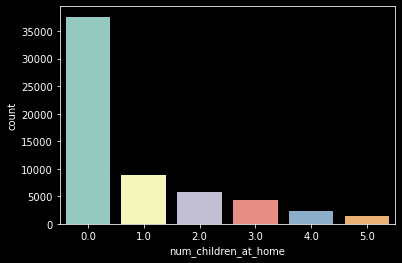

In [90]:
sns.countplot (dataset['num_children_at_home'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='store_city', ylabel='count'>

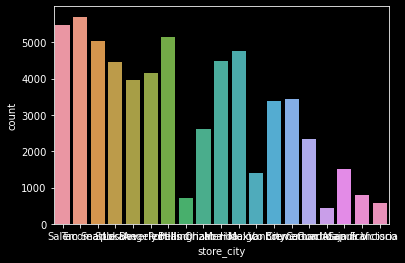

In [91]:
sns.countplot (dataset['store_city'])

In [92]:
LE = LabelEncoder()
dataset['food_category'] = LE.fit_transform(dataset['food_category'])
dataset['food_department'] = LE.fit_transform(dataset['food_department'])
dataset['food_family'] = LE.fit_transform(dataset['food_family'])
dataset['promotion_name'] = LE.fit_transform(dataset['promotion_name'])
dataset['sales_country'] = LE.fit_transform(dataset['sales_country'])
dataset['marital_status'] = LE.fit_transform(dataset['marital_status'])
dataset['gender'] = LE.fit_transform(dataset['gender'])
dataset['education'] = LE.fit_transform(dataset['education'])
dataset['member_card'] = LE.fit_transform(dataset['member_card'])
dataset['occupation'] = LE.fit_transform(dataset['occupation'])
dataset['houseowner'] = LE.fit_transform(dataset['houseowner'])
dataset['brand_name'] = LE.fit_transform(dataset['brand_name'])
dataset['store_type'] = LE.fit_transform(dataset['store_type'])
dataset['store_city'] = LE.fit_transform(dataset['store_city'])
dataset['store_state'] = LE.fit_transform(dataset['store_state'])
dataset['media_type'] = LE.fit_transform(dataset['media_type'])
dataset['avg. yearly_income'] = LE.fit_transform(dataset['avg. yearly_income'])

In [93]:
dataset

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,4,12,1,7.36,2.7232,4.0,0,2,0,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,3,126.62
1,4,12,1,5.52,2.5944,3.0,6,2,0,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,3,59.86
2,4,12,1,3.68,1.3616,2.0,18,2,1,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,3,84.16
3,4,12,1,3.68,1.1776,2.0,6,2,0,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,5,95.78
4,4,12,1,4.08,1.4280,3.0,11,2,0,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,7,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,42,7,2,2.76,1.3248,1.0,48,2,0,0,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,5,95.25
60424,42,7,2,1.60,0.4960,1.0,24,2,1,0,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,9,69.42
60425,42,7,2,5.52,2.5392,2.0,47,2,0,1,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,11,67.51
60426,42,7,2,8.28,2.5668,3.0,31,0,1,1,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,9,132.88


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  int32  
 1   food_department             60428 non-null  int32  
 2   food_family                 60428 non-null  int32  
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  int32  
 7   sales_country               60428 non-null  int32  
 8   marital_status              60428 non-null  int32  
 9   gender                      60428 non-null  int32  
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  int32  
 12  member_card                 60428 non-null  int32  
 13  occupation                  604

In [95]:
x = dataset.iloc[:,:-1].values
x

array([[ 4., 12.,  1., ...,  1.,  1.,  3.],
       [ 4., 12.,  1., ...,  1.,  1.,  3.],
       [ 4., 12.,  1., ...,  1.,  1.,  3.],
       ...,
       [42.,  7.,  2., ...,  0.,  0., 11.],
       [42.,  7.,  2., ...,  0.,  1.,  9.],
       [42.,  7.,  2., ...,  0.,  1.,  3.]])

In [98]:
SC = StandardScaler()
x[:,:] = SC.fit_transform(x[:,:])

In [99]:
y = dataset.iloc[:,-1].values
y

array([126.62,  59.86,  84.16, ...,  67.51, 132.88,  87.76])

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.2 ,random_state = 0)

In [101]:
RFR = RandomForestRegressor (random_state=12)
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)

In [104]:
ACC = r2_score(y_test, y_pred)
print (ACC)

0.9988009615947181
